<h3><b>Importing required Packages</b></h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
athletes_df = pd.read_csv("D:/BITS/PFA/Dataset Assignment/athletes.csv")

<h3><b>1. Finding Countries with the most percentage of female athletes </h3></b>

In [3]:
female_athletes = athletes_df[athletes_df['gender'] == 'Female'].groupby('country').size().reset_index(name ='count')
female_athletes.head()

,country,count
0,AIN,17
1,Afghanistan,3
2,Albania,3
3,Algeria,19
4,American Samoa,1


In [11]:
athletes_df[['name','birth_date','birth_place']].nunique()

name           11103
birth_date      5518
birth_place     4725
dtype: int64

In [5]:
total_athletes = athletes_df.groupby('country').size().reset_index(name='total_count')
total_athletes

,country,total_count
0,AIN,32
1,Afghanistan,6
2,Albania,8
3,Algeria,46
4,American Samoa,2
...,...,...
201,"Virgin Islands, B",4
202,"Virgin Islands, US",5
203,Yemen,4
204,Zambia,31


In [6]:
female_athletes = female_athletes.merge(total_athletes,on='country')

In [7]:
female_athletes.head(20)

,country,count,total_count
0,AIN,17,32
1,Afghanistan,3,6
2,Albania,3,8
3,Algeria,19,46
4,American Samoa,1,2
5,Andorra,1,2
6,Angola,17,25
7,Antigua and Barbuda,2,5
8,Argentina,33,143
9,Armenia,2,15


In [8]:
female_athletes['pct'] = (female_athletes['count']*100 / female_athletes['total_count'])
female_athletes.sort_values(by='pct',ascending=False).head(10)

,country,count,total_count,pct
163,Solomon Islands,2,2,100.000000
76,Guam,7,8,87.500000
130,Nicaragua,6,7,85.714286
98,Kosovo,7,9,77.777778
159,Sierra Leone,3,4,75.000000
101,Lao PDR,3,4,75.000000
194,Vietnam,12,16,75.000000
132,Nigeria,63,86,73.255814
50,DPR Korea,10,14,71.428571
198,Zambia,22,31,70.967742


<h3><b>2. Finding the most spoken languages</h3></b>

In [33]:
(athletes_df['lang'].str.strip().str.split(',').explode().str.strip().str.split(',').value_counts().sort_values(ascending=False)*100 / len(athletes_df)).agg(['count'])

count    231
Name: lang, dtype: int64

<h3><b> Pct of athletes who attended college </b></h3>

In [12]:
athletes_df['education'].value_counts(ascending=False)

Physical Education                                                                                                                                                                                        8
Studied at Beijing Sport University (CHN)                                                                                                                                                                 7
Studied Physical Education                                                                                                                                                                                6
Studied at Shanghai University of Sport (CHN)                                                                                                                                                             6
Studied at Shanghai Jiao Tong University (CHN)                                                                                                                                          

In [35]:
athletes_df['education'].str.contains('College|University|university|college').value_counts(normalize=True)

True     0.824124
False    0.175876
Name: education, dtype: float64

<h3><b> Pct of Athletes with an MBA <h3><b>

In [40]:
athletes_df['education'] = athletes_df['education'].str.lower()
athletes_df['education'].str.contains('mba|master of business administration').value_counts()

False    5508
True       30
Name: education, dtype: int64

<h3><b>Physics Degree

In [42]:
athletes_df['education'].str.contains('physics').value_counts()

False    5511
True       27
Name: education, dtype: int64

<h3><b> CS

In [44]:
athletes_df['education'].str.contains('computer science').value_counts()

False    5497
True       41
Name: education, dtype: int64

<h3><b> Sports Management / Physical Education

In [49]:
athletes_df['education'].str.contains('sports|sport|physical').value_counts()

False    4161
True     1377
Name: education, dtype: int64

<h3><b>Event wise break down </h3></b>

In [79]:
stream_wise= athletes_df['disciplines'].str.strip().str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index()
stream_wise['index'] = stream_wise['index'].str.replace('[','').str.replace(']','').str.replace("'",'')

C:\Users\guzzu\AppData\Local\Temp\ipykernel_14884\317281149.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stream_wise['index'] = stream_wise['index'].str.replace('[','').str.replace(']','').str.replace("'",'')


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

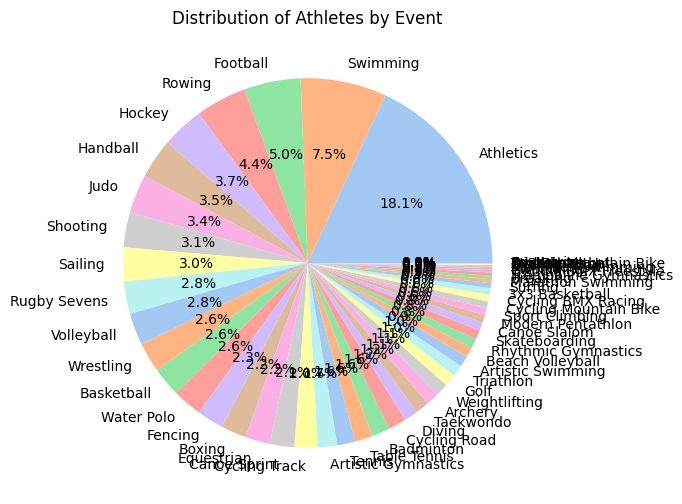

In [81]:
plt.figure(figsize=(6, 6))
plt.pie(
    stream_wise['disciplines'], 
    labels=stream_wise['index'], 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel")
)
plt.title('Distribution of Athletes by Event')
plt.show()

<h3><b>Pct of married Athletes</b></h3>

In [12]:
married = athletes_df['family'].str.lower().str.contains('married|wife|husband|spouse').value_counts()

In [13]:
married[1]

1260

In [14]:
married[1]*100/len(athletes_df)

11.338072527670295

<h3><b>Number of Multilingual Athletes</h3></b>
Finding the percentage of athletes who speak 2 or more languages

In [82]:
athletes_df['lang'].dropna().str.split(',').apply(len).value_counts(normalize=True)*100

1    61.895332
2    29.014616
3     7.090995
4     1.546440
5     0.367751
6     0.066007
8     0.009430
7     0.009430
Name: lang, dtype: float64

<h3><b>Analysing the Athlete age</h3></b>

In [16]:
from datetime import datetime 
olympic_begin = datetime(2024,7,26)
dob_known = athletes_df['birth_date'].dropna()
dob_known = pd.to_datetime(dob_known)

athletes_df['age'] =  olympic_begin.year - dob_known.dt.year

C:\Users\guzzu\AppData\Local\Temp\ipykernel_14884\3948675832.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dob_known = pd.to_datetime(dob_known)


In [17]:
len(athletes_df)

11113

In [18]:
athletes_df['age'].describe()

count    11113.000000
mean        26.967875
std          5.408623
min         12.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         70.000000
Name: age, dtype: float64

In [19]:
def computeAge(row):
    if row['birth_date'].month - olympic_begin.month < 0 or (
        row['birth_date'].month == olympic_begin.month and row['birth_date'].day > olympic_begin.day
    ):
        return olympic_begin.year - row['birth_date'].year - 1
    else:
        return olympic_begin.year - row['birth_date'].year

athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'])

athletes_df['age'] = athletes_df.apply(computeAge,axis=1)

C:\Users\guzzu\AppData\Local\Temp\ipykernel_14884\3514191437.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'])


In [20]:
athletes_df['age'].describe()

count    11113.000000
mean        26.446144
std          5.449107
min         12.000000
25%         23.000000
50%         26.000000
75%         29.000000
max         69.000000
Name: age, dtype: float64

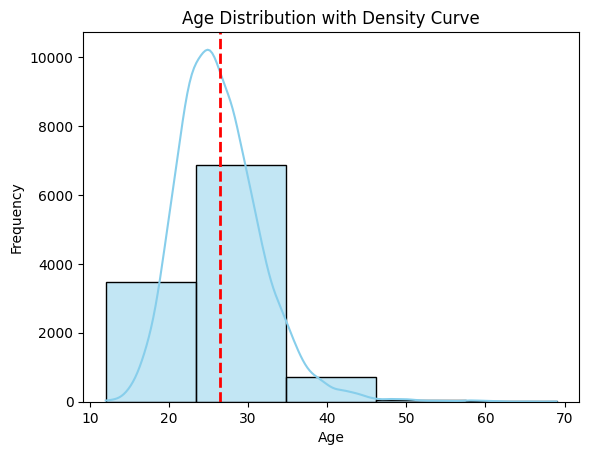

In [87]:
sns.histplot(athletes_df['age'], kde=True, bins=5, color='skyblue', edgecolor='black')
meanage = athletes_df['age'].mean()
plt.axvline(meanage, color='red', linestyle='--', linewidth=2, label=f'Mean: {meanage}')
# Add labels and title
plt.title('Age Distribution with Density Curve')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<h3><b>Country Wise Age Breakdown</h3></b>

In [21]:
country_grouped_age = athletes_df.groupby('country')

In [22]:

country_grouped_age = country_grouped_age['age'].agg(['count','mean'])

In [23]:
country_grouped_age[country_grouped_age['count'] >50 ].sort_values(by='mean',ascending=True)

,count,mean
country,,
Israel,89,23.988764
Uzbekistan,88,24.011364
China,398,24.821608
Nigeria,86,24.976744
Egypt,157,25.070064
Thailand,52,25.173077
Morocco,61,25.459016
Dominican Republic,59,25.576271
Korea,147,25.789116


<h3><b>Medalists</h3></b>

In [24]:
medalists = pd.read_csv("D:\BITS\PFA\Dataset Assignment\medallists.csv")

In [25]:
num_medals = medalists.groupby('country').size()

In [26]:
num_medals.sort_values(ascending=False)

country
United States    330
France           187
China            168
Great Britain    162
Australia        123
                ... 
Peru               1
Panama             1
Pakistan           1
Mongolia           1
Zambia             1
Length: 92, dtype: int64

In [27]:
num_medals.name = 'medals'
age_medals = country_grouped_age.merge(num_medals,on='country')


<h3><b>Age doesn't play much of a role in Olympics</b></h3>

In [28]:
age_medals

age_medals['mean'].corr(age_medals['medals'])

0.054662734776185065

In [29]:
def computeAge(row):
    if row['birth_date'].month - olympic_begin.month < 0 or (
        row['birth_date'].month == olympic_begin.month and row['birth_date'].day > olympic_begin.day
    ):
        return olympic_begin.year - row['birth_date'].year - 1
    else:
        return olympic_begin.year - row['birth_date'].year

medalists['birth_date'] = pd.to_datetime(medalists['birth_date'])

medalists['age'] = medalists.apply(computeAge,axis=1)

In [30]:
medalists['age'].corr(medalists['medal_code'])

-0.005558291933466746

In [ ]:
country_wise_age = athletes_df.groupby('country')


In [137]:
country_wise_age['gender'].value_counts().loc['India']

gender
Male      66
Female    46
Name: gender, dtype: int64